Install the required libraries

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 71.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9aa281033c94089cbd6ee3c31746d0497c4a4c4a8fb840553d371df8507a9a07
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=388b96033cff984fa3d8e6cdeef8f5ba2cc1b96dece7687e31c8c56050b85a63
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
!pip install umap-learn[plot]

     |████████████████████████████████| 15.8 MB 10.0 MB/s 
     |████████████████████████████████| 76 kB 3.1 MB/s 
     |████████████████████████████████| 136 kB 17.2 MB/s 
     |████████████████████████████████| 837 kB 39.3 MB/s 
     |████████████████████████████████| 830 kB 61.3 MB/s 
     |████████████████████████████████| 822 kB 60.4 MB/s 
     |████████████████████████████████| 802 kB 27.7 MB/s 
     |████████████████████████████████| 802 kB 59.7 MB/s 
     |████████████████████████████████| 793 kB 53.8 MB/s 
     |████████████████████████████████| 793 kB 36.3 MB/s 
     |████████████████████████████████| 791 kB 49.0 MB/s 
     |████████████████████████████████| 786 kB 53.7 MB/s 
     |████████████████████████████████| 779 kB 50.4 MB/s 
     |████████████████████████████████| 778 kB 50.2 MB/s 
     |████████████████████████████████| 776 kB 11.2 MB/s 
     |████████████████████████████████| 769 kB 44.8 MB/s 
     |████████████████████████████████| 766 kB 54.1 MB/s 
     |█████████

In [ ]:
!pip install umap-learn[plot]

Import the required libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import umap
import umap.plot

Load the Google Universal Sentence Encoder Model

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
def embed(input):
  return model([input])

Load the preprocessed data with sentiment labels

In [ ]:
df=pd.read_csv('preprocessed-data-with-sentiment.csv')
df.head()

,label,text,sentiment_vader
0,rec.sport.hockey,pens fans pretty confused lack kind posts rece...,0
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,1
2,talk.politics.mideast,finally dream mediterranean area greater holoc...,0
3,comp.sys.ibm.pc.hardware,scsi card doing dma transfers disks scsi card ...,1
4,comp.sys.mac.hardware,[number] old drive cannot understanding driver...,1


Generate sentence embeddings for each text in the data

In [ ]:
df['sentence_embedding'] = df['text'].apply(embed)

In [ ]:
df=pd.DataFrame(data=df)
df

,label,text,sentiment_vader,sentence_embedding
0,rec.sport.hockey,pens fans pretty confused lack kind posts rece...,0,"((tf.Tensor(-0.039444264, shape=(), dtype=floa..."
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,1,"((tf.Tensor(-0.039467372, shape=(), dtype=floa..."
2,talk.politics.mideast,finally dream mediterranean area greater holoc...,0,"((tf.Tensor(-0.057665747, shape=(), dtype=floa..."
3,comp.sys.ibm.pc.hardware,scsi card doing dma transfers disks scsi card ...,1,"((tf.Tensor(0.048537795, shape=(), dtype=float..."
4,comp.sys.mac.hardware,[number] old drive cannot understanding driver...,1,"((tf.Tensor(-0.05286335, shape=(), dtype=float..."
...,...,...,...,...
18265,sci.med,dn david dn dn consultation cheaper scan diffe...,1,"((tf.Tensor(-0.052825365, shape=(), dtype=floa..."
18266,sci.electronics,isolated ground usually unusual color orange y...,0,"((tf.Tensor(-0.06648626, shape=(), dtype=float..."
18267,comp.sys.ibm.pc.hardware,installed dx2 [number] cpu clone motherboard t...,1,"((tf.Tensor(-0.048566166, shape=(), dtype=floa..."
18268,comp.graphics,wouldn require sphere [number] space [number] ...,0,"((tf.Tensor(-0.027611975, shape=(), dtype=floa..."


In [ ]:
X=df['sentence_embedding']
X.shape

(18270,)

In [ ]:
X_new = np.array([x.numpy() for x in X]).reshape((df.shape[0],512))
X_new.shape

(18270, 512)

Fit the LDA model to the generated embeddings

In [ ]:
X = X_new
Y= df['label'].values
mod = LinearDiscriminantAnalysis()
mod.fit(X, Y)

LinearDiscriminantAnalysis()

In [ ]:
from collections import Counter
Counter(mod.predict(X_new))

Counter({'alt.atheism': 844,
         'comp.graphics': 1003,
         'comp.os.ms-windows.misc': 974,
         'comp.sys.ibm.pc.hardware': 1017,
         'comp.sys.mac.hardware': 903,
         'comp.windows.x': 872,
         'misc.forsale': 1012,
         'rec.autos': 883,
         'rec.motorcycles': 918,
         'rec.sport.baseball': 871,
         'rec.sport.hockey': 876,
         'sci.crypt': 806,
         'sci.electronics': 1118,
         'sci.med': 889,
         'sci.space': 972,
         'soc.religion.christian': 931,
         'talk.politics.guns': 913,
         'talk.politics.mideast': 817,
         'talk.politics.misc': 1078,
         'talk.religion.misc': 573})

In [ ]:
preds = mod.predict(X_new)

Visualize the clusters using UMAP

In [ ]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df.label, preds))
print("Completeness: %0.3f" % metrics.completeness_score(df.label, preds))
print("V-measure: %0.3f" % metrics.v_measure_score(df.label, preds))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(df.label, preds))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_new, preds, sample_size=1000))

Homogeneity: 0.583
Completeness: 0.584
V-measure: 0.584
Adjusted Rand-Index: 0.491
Silhouette Coefficient: 0.010


In [ ]:
embedding = umap.UMAP(n_components=2).fit(X_new)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
import seaborn as sns

In [ ]:
from sklearn import metrics
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=20)

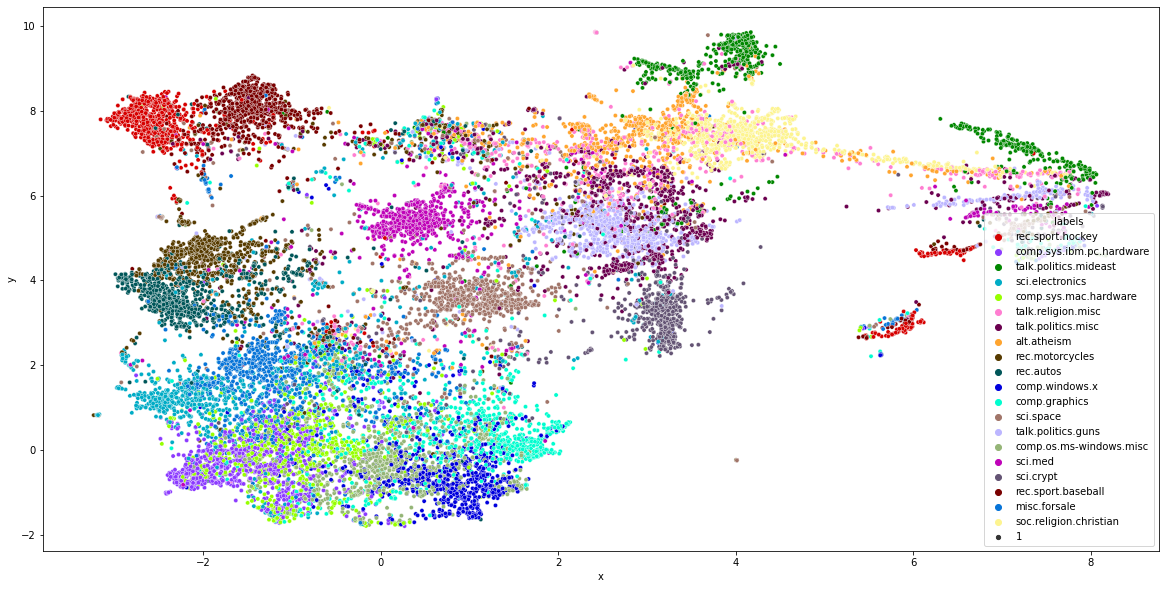

In [ ]:
# Prepare data
umap_data = embedding.fit_transform(X_new)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = preds

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
sns.scatterplot(data=result, x="x", y="y", size=1, hue="labels", palette=palette)